In [5]:
import pandas as pd
from pandas import DataFrame
import math as math
import matplotlib.pyplot as plt


In [6]:
remote_files = False

path_prefix = "https://github.com/0xMarmelade/FIN-429-Sustainable-finance/raw/main/Homework 1/" if remote_files else "C:/Users/mbela/ecole/FIN-429-Sustainable-finance/Data_Excel/"

firms = pd.read_excel(path_prefix + 'MSCI_ESGscores/firm_names.xlsx')
scores = pd.read_excel(path_prefix + 'MSCI_ESGscores/Scores/Soc.xlsx', index_col = 0)
returns = pd.read_excel(path_prefix + 'MSCI_ESGscores/Returns/monthlyreturns.xlsx', index_col = 0)
market_values = pd.read_excel(path_prefix + 'MSCI_ESGscores/Fundamentals/size.xlsx', index_col=0)
eu_risk_free_rates = pd.read_excel(path_prefix + 'MSCI_ESGscores/FF/eurf.xlsx', index_col=0)
eu_countrycodes = ['AL','AD', 'AM','AT','BA','BE','BG','CH','CY','DE','DK','EE','ES','FI','FR','GE', 'GB','GR','HR','HU','IE','IS','IT','LT','LV','MC','MK','MT','NL','NO','PL','PT','RO','RS', 'RU','SE','SI', 'TR', 'UA', 'MD', 'LI']

In [4]:
scores = scores.transpose()
scores.index.rename('ISIN', inplace=True)

firms.set_index("ISIN", inplace=True)

Join Social scores to firm's names and locations
Filter on firms that are located in Europe.
Variable  `eu_firm_names` containes the relevant firm names for our analysis.

In [5]:
scores.dropna(how='all', axis='index', inplace=True)
scores = scores.join(firms, how='left', on='ISIN')
scores = scores[scores["Country"].isin(eu_countrycodes)]


Remove firms with unusual data:
- GB00B45TWN62 all empty or NaN
- GB00B979H674 NaN, 0 and one valid datapoint)
- DE000A2YPGA9 Only traded recently with abnormaly high volatility
- GB0031718066 Only has few data points and stratospherous returns
- IE00BLNN3691 (Weatherford International Ltd. Equity) has a weird extremely high return in end 2019.
df.loc[~df.index.duplicated(), :]

In [6]:
scores.drop(['GB00B45TWN62', 'GB00B979H674', 'NL0010157558', 'GB0031718066','IE00BLNN3691'], axis='index', inplace=True)
eu_firm_names = scores.index

In [7]:
eu_firm_names = eu_firm_names[~eu_firm_names.duplicated()]

In [8]:
eu_firm_returns = returns[eu_firm_names]
eu_firm_market_values = market_values[eu_firm_names]
eu_firm_returns.head()

,AT00000VIE62,AT0000606306,AT0000642806,AT0000652011,AT0000720008,AT0000730007,AT0000743059,AT0000746409,AT0000767553,AT0000831706,...,RU000A0DQZE3,RU000A0JPFP0,RU000A0JKQU8,RU000A0DKXV5,RU000A0DKVS5,RU000A0JRKT8,RU000A0B6NK6,US92927K1025,US98387E2054,VGG1890L1076
2002-01-31,0.004704,NaN,NaN,0.044299,0.028358,-0.031736,0.017735,0.011466,-0.000433,0.035838,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-02-28,0.056424,NaN,NaN,-0.053178,0.016936,-0.100985,0.001924,0.036171,0.105286,0.037705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-31,0.013897,NaN,NaN,0.102579,-0.055194,0.000246,0.012976,-0.027588,0.141121,0.085674,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-04-30,0.099059,NaN,NaN,0.130746,0.032542,0.279030,0.131208,0.052367,-0.127104,0.014885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-31,0.085816,NaN,NaN,0.198617,0.019151,0.177818,-0.015824,0.103447,0.035419,0.017236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
scores.drop(["Name", "Sector", "Country"], axis='columns', inplace=True)
scores.describe()


,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,...,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31
count,361.000000,403.000000,415.000000,421.000000,424.000000,436.000000,437.000000,442.000000,447.000000,447.000000,...,735.000000,735.000000,733.000000,733.000000,723.000000,722.000000,723.000000,721.000000,718.000000,718.000000
mean,5.989640,5.993772,6.018482,6.022898,6.008561,5.999679,6.008604,5.988281,5.969485,5.934183,...,5.111973,5.113878,5.101228,5.105730,5.102351,5.118560,5.125864,5.141331,5.147632,5.155989
std,1.539132,1.553705,1.564267,1.572517,1.586268,1.555721,1.552013,1.558517,1.557143,1.550205,...,1.536573,1.521167,1.518443,1.514302,1.527335,1.507067,1.507188,1.498735,1.491945,1.481663
min,0.760000,0.760000,0.760000,0.760000,0.760000,1.890000,1.890000,1.890000,1.890000,1.890000,...,0.600000,0.600000,0.600000,0.600000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,5.040000,5.050000,5.050000,5.060000,5.037500,4.947500,4.950000,4.940000,4.905000,4.890000,...,4.100000,4.200000,4.200000,4.200000,4.200000,4.300000,4.300000,4.300000,4.300000,4.200000
50%,6.110000,6.100000,6.120000,6.110000,6.095000,6.055000,6.060000,6.055000,6.040000,6.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,7.110000,7.160000,7.225000,7.220000,7.222500,7.242500,7.280000,7.217500,7.210000,7.110000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.100000
max,9.580000,9.580000,9.580000,9.580000,9.580000,9.580000,9.580000,9.580000,9.580000,9.420000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### Selecting 50 random firms for the analysis

In [10]:
returns.dropna(how='all', axis='columns', inplace=False);

In [16]:
def portfolio_stats(weighted_returns: DataFrame, name: str = '') -> DataFrame:

    by_month_returns = weighted_returns.sum(axis='columns')

    portfolio = {}
    portfolio['AAR'] = by_month_returns.mean() * 12
    portfolio['Annualized volatility'] = by_month_returns.std() * math.sqrt(12)
    portfolio['Min return'] = by_month_returns.min()
    portfolio['Max return'] = by_month_returns.max()
    portfolio['Sharpe ratio'] = (portfolio['AAR'] - eu_risk_free_rates.values.mean()) / (portfolio['Annualized volatility'])

    return pd.DataFrame(portfolio, index=[name])

## Question 4

### 4.1 Split the firms in quintiles wrt to their ESG (Social) scores

In [12]:
eu_firm_market_values.head()

,AT00000VIE62,AT0000606306,AT0000642806,AT0000652011,AT0000720008,AT0000730007,AT0000743059,AT0000746409,AT0000767553,AT0000831706,...,RU000A0DQZE3,RU000A0JPFP0,RU000A0JKQU8,RU000A0DKXV5,RU000A0DKVS5,RU000A0JRKT8,RU000A0B6NK6,US92927K1025,US98387E2054,VGG1890L1076
2007-01-31,2093760000,21794700000,NaN,24528200000,13632600000,2795590000,16033900000,14902300000,NaN,4568310000,...,NaN,NaN,2402580000,NaN,17610600000,NaN,NaN,NaN,5899080000,NaN
2007-02-28,1947470000,19213800000,NaN,23431600000,12505100000,2743850000,16658400000,12973400000,NaN,4563780000,...,NaN,NaN,2842250000,NaN,17003300000,NaN,NaN,NaN,6212980000,NaN
2007-03-31,2056020000,20092800000,NaN,24549000000,11494200000,3260330000,18788600000,13813400000,NaN,4630660000,...,NaN,NaN,3121210000,NaN,17534700000,NaN,NaN,NaN,5996500000,NaN
2007-04-30,2289780000,20032300000,NaN,25391700000,13068100000,3374040000,19054000000,15942600000,NaN,5373820000,...,NaN,NaN,3431770000,NaN,16699700000,NaN,NaN,NaN,6602640000,NaN
2007-05-31,2047910000,22315000000,NaN,24725300000,12585300000,3518240000,19906300000,16578200000,NaN,5596700000,...,NaN,NaN,3012490000,NaN,14726100000,NaN,NaN,NaN,6602640000,NaN


In [13]:
scores = scores.T
quintile_weights = pd.DataFrame(index=scores.index, columns=scores.columns)

for index, row in scores.iterrows():
    quintile_weights.loc[index] = pd.qcut(row, 5, labels=[1, 2, 3, 4, 5])

In [14]:
quintile_weights = quintile_weights[~quintile_weights.duplicated()]
quintile_weights = quintile_weights.loc[:, ~quintile_weights.columns.duplicated()]
quintile_weights.head()

ISIN,AT00000VIE62,AT0000606306,AT0000642806,AT0000652011,AT0000720008,AT0000730007,AT0000743059,AT0000746409,AT0000767553,AT0000831706,...,RU000A0DQZE3,RU000A0JPFP0,RU000A0JKQU8,RU000A0DKXV5,RU000A0DKVS5,RU000A0JRKT8,RU000A0B6NK6,US92927K1025,US98387E2054,VGG1890L1076
2007-01-31 00:00:00,NaN,NaN,NaN,1.0,2.0,NaN,5.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28 00:00:00,NaN,NaN,NaN,1.0,2.0,NaN,5.0,5.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-31 00:00:00,NaN,NaN,NaN,1.0,2.0,NaN,5.0,5.0,2.0,3.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-30 00:00:00,NaN,NaN,NaN,1.0,2.0,NaN,5.0,5.0,2.0,3.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-31 00:00:00,NaN,NaN,NaN,1.0,2.0,NaN,5.0,5.0,2.0,3.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4.2 Equally weighted portfolios within quintiles

In [15]:
equal_quintile_portfolios = pd.DataFrame()
equal_quintile_time_series = pd.DataFrame()

for i in [1.0, 2.0, 3.0, 4.0, 5.0]:
    quintile_equal_weights = pd.DataFrame(index=scores.index, columns=scores.columns)
    for index, row in quintile_weights[quintile_weights == i].iterrows():
        # We have to divide row by row to force skipping NaN values
        quintile_equal_weights.loc[index] = (row / (row * row.count())).T

    portfolio_results = quintile_equal_weights * eu_firm_returns
    portfolio_results = portfolio_results[portfolio_results.index.year >= 2007]

    if i == 2.0:
        test = portfolio_results

    equal_quintile_portfolios['Quintile ' + str(i)] = portfolio_stats(portfolio_results, "").sum(axis=0)
    equal_quintile_time_series['Quintile ' + str(i)] = portfolio_results.sum(axis=1)

In [16]:
equal_quintile_portfolios

,Quintile 1.0,Quintile 2.0,Quintile 3.0,Quintile 4.0,Quintile 5.0
AAR,0.085671,0.056062,0.078134,0.078595,0.082726
Annualized volatility,0.255575,0.243180,0.235342,0.233492,0.232249
Min return,-0.261428,-0.241968,-0.241956,-0.249721,-0.231380
Max return,0.286074,0.240236,0.217304,0.242940,0.243050
Sharpe ratio,0.331215,0.226339,0.327661,0.332232,0.351799


<AxesSubplot:title={'center':'Equally weighted portfolio returns (cumulative)'}>

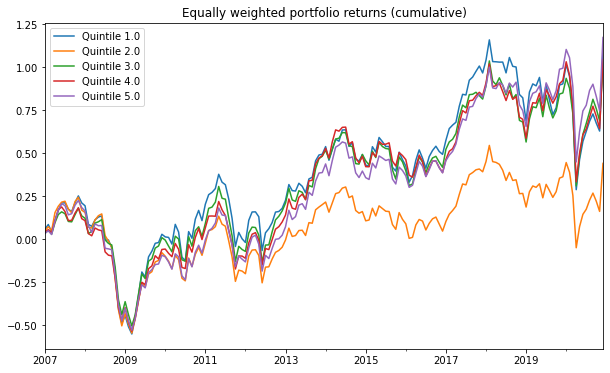

In [17]:
((equal_quintile_time_series + 1).cumprod() - 1).plot(figsize=(10,6), title='Equally weighted portfolio returns (cumulative)')

### 4.2.1 Value-weighted portfolios within quintiles

In [18]:
value_quintile_portfolios = pd.DataFrame()
value_quintile_time_series = pd.DataFrame()

for i in [1.0, 2.0, 3.0, 4.0, 5.0]:
    quintile_value_weights = pd.DataFrame(index=scores.index, columns=scores.columns)
    for index, row in eu_firm_market_values.iterrows():
        quintile_market_value = row[quintile_weights.loc[index] == i].sum()
        new_row = row[quintile_weights.loc[index] == i] / quintile_market_value
        quintile_value_weights.loc[index] = new_row

    portfolio_results = quintile_value_weights * eu_firm_returns
    portfolio_results = portfolio_results[portfolio_results.index.year >= 2007]
    value_quintile_portfolios['Quintile ' + str(i)] = portfolio_stats(portfolio_results, "").sum()
    value_quintile_time_series['Quintile ' + str(i)] = portfolio_results.sum(axis=1)

,Quintile 1.0,Quintile 2.0,Quintile 3.0,Quintile 4.0,Quintile 5.0
AAR,0.131582,0.104588,0.114029,0.100350,0.118983
Annualized volatility,0.262538,0.233281,0.227375,0.217707,0.215418
Min return,-0.308691,-0.242146,-0.174944,-0.178579,-0.185004
Max return,0.282419,0.208255,0.197027,0.202968,0.193877
Sharpe ratio,0.497303,0.443957,0.497011,0.456250,0.547599


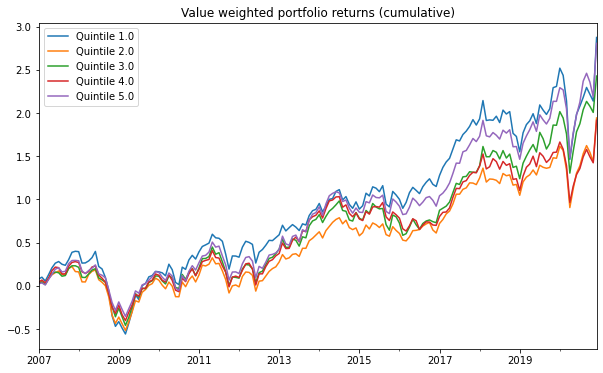

In [19]:
((value_quintile_time_series + 1).cumprod() - 1).plot(figsize=(10,6), title='Value weighted portfolio returns (cumulative)')
value_quintile_portfolios

## 4.3 Shorting the highest valued firms

### 4.3.1 Equally weighted portfolios within quintiles

In [20]:
shorting_equal_quintile_portfolios = {}

for i in [1.0, 5.0]:
    quintile_equal_weights = pd.DataFrame(index=scores.index, columns=scores.columns)
    for index, row in quintile_weights[quintile_weights == i].iterrows():
        # We have to divide row by row to force skipping NaN values
        quintile_equal_weights.loc[index] = (row / (row * row.count())).T

    portfolio_results = quintile_equal_weights * eu_firm_returns
    shorting_equal_quintile_portfolios['Quintile ' + str(i)] = portfolio_results[portfolio_results.index.year >= 2007]

Computing average annual return for the strategy

In [21]:
((0.5 * shorting_equal_quintile_portfolios['Quintile 1.0'].sum(axis=1).mean()) + (0.5 *(shorting_equal_quintile_portfolios['Quintile 5.0'].sum(axis=1) * -1).mean())) * 12

0.0014726348444587378

,Quintile 1.0,Quintile 2.0,Quintile 3.0,Quintile 4.0,Quintile 5.0
AAR,0.085671,0.056062,0.078134,0.078595,0.082726
Annualized volatility,0.255575,0.243180,0.235342,0.233492,0.232249
Min return,-0.261428,-0.241968,-0.241956,-0.249721,-0.231380
Max return,0.286074,0.240236,0.217304,0.242940,0.243050
Sharpe ratio,0.331215,0.226339,0.327661,0.332232,0.351799


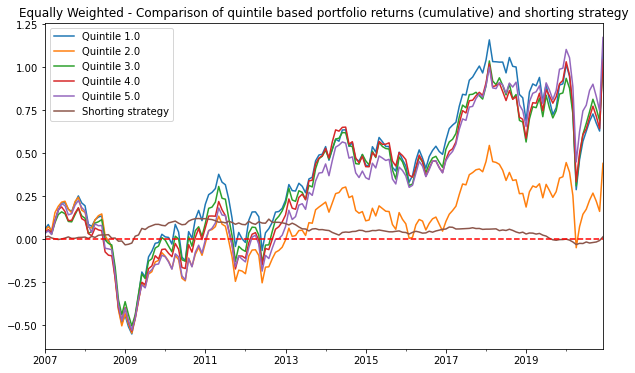

In [101]:
equal_quintile_time_series['Shorting strategy'] = ((-0.5 * shorting_equal_quintile_portfolios['Quintile 5.0'].sum(axis=1)) + (0.5 * shorting_equal_quintile_portfolios['Quintile 1.0'].sum(axis=1)))

((equal_quintile_time_series + 1).cumprod() - 1).plot(figsize=(10,6), title='Equally Weighted - Comparison of quintile based portfolio returns (cumulative) and shorting strategy').axhline(0, color='red', linestyle='--')
equal_quintile_portfolios

In [23]:
shorting_value_quintile_portfolios = {}

for i in [1.0, 5.0]:
    quintile_value_weights = pd.DataFrame(index=eu_firm_market_values.index, columns=eu_firm_market_values.columns)
    for index, row in eu_firm_market_values.iterrows():
        quintile_market_value = row[quintile_weights.loc[index] == i].sum()
        new_row = row[quintile_weights.loc[index] == i] / quintile_market_value
        quintile_value_weights.loc[index] = new_row

    portfolio_results = quintile_value_weights * eu_firm_returns
    shorting_value_quintile_portfolios['Quintile ' + str(i)] = portfolio_results[portfolio_results.index.year >= 2007]

In [24]:
((0.5 * shorting_equal_quintile_portfolios['Quintile 1.0'].sum(axis=1).mean()) + (0.5 *(shorting_equal_quintile_portfolios['Quintile 5.0'].sum(axis=1) * -1).mean())) * 12

0.0014726348444587378

,Quintile 1.0,Quintile 2.0,Quintile 3.0,Quintile 4.0,Quintile 5.0
AAR,0.131582,0.104588,0.114029,0.100350,0.118983
Annualized volatility,0.262538,0.233281,0.227375,0.217707,0.215418
Min return,-0.308691,-0.242146,-0.174944,-0.178579,-0.185004
Max return,0.282419,0.208255,0.197027,0.202968,0.193877
Sharpe ratio,0.497303,0.443957,0.497011,0.456250,0.547599


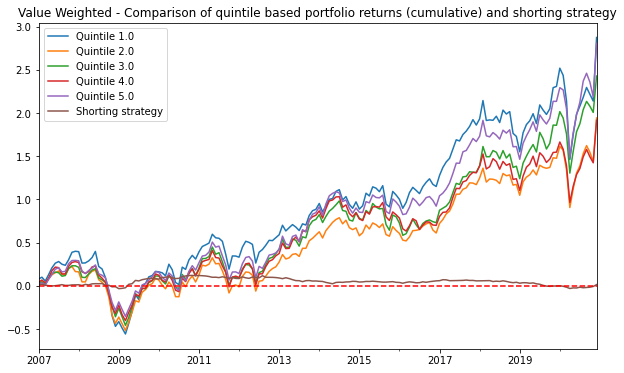

In [25]:
value_quintile_time_series['Shorting strategy'] = ((-0.5 * shorting_equal_quintile_portfolios['Quintile 5.0'].sum(axis=1)) + (0.5 * shorting_equal_quintile_portfolios['Quintile 1.0'].sum(axis=1)))

((value_quintile_time_series + 1).cumprod() - 1).plot(figsize=(10,6), title='Value Weighted - Comparison of quintile based portfolio returns (cumulative) and shorting strategy').axhline(0, color='red', linestyle='--')
value_quintile_portfolios

## Question 5

In [11]:
from pypfopt import EfficientFrontier, expected_returns, risk_models
from tqdm import tqdm

sample_50_firms = ['GB00BMHTPY25', 'GB00B0744B38', 'CH0256424794', 'HU0000153937',
                    'IT0000072618', 'NL0011585146', 'CH0130293662', 'SE0000242455',
                    'BE0003797140', 'PTBCP0AM0015', 'CH0198251305', 'FR0000051807',
                    'GB00BH0P3Z91', 'SE0007100599', 'ES0113211835', 'NO0003054108',
                    'GB00B1Z7RQ77', 'GB0006776081', 'SE0000667891', 'BE0974264930',
                    'NL0009739424', 'PLPEKAO00016', 'NL0012969182', 'TRATUPRS91E8',
                    'DK0010311471', 'BE0003565737', 'GB00BYSRJ698', 'DK0060636678',
                    'IT0001353173', 'GB0031575722', 'CH0021783391', 'GB0001367019',
                    'SE0000308280', 'PLCFRPT00013', 'GB0006215205', 'IT0001269361',
                    'IE00BYTBXV33', 'US0543031027', 'GB00BFG3KF26', 'DE0005557508',
                    'IT0003497168', 'GRS419003009', 'GB00B127GF29', 'CH0038863350',
                    'DE0005773303', 'DK0010181759', 'RU000A0J2Q06', 'IE00B59HWB19',
                    'ES0148396007', 'FI0009800643']

In [12]:
returns[sample_50_firms]

,GB00BMHTPY25,GB00B0744B38,CH0256424794,HU0000153937,IT0000072618,NL0011585146,CH0130293662,SE0000242455,BE0003797140,PTBCP0AM0015,...,IT0003497168,GRS419003009,GB00B127GF29,CH0038863350,DE0005773303,DK0010181759,RU000A0J2Q06,IE00B59HWB19,ES0148396007,FI0009800643
2002-01-31,0.042958,-0.007411,NaN,-0.005747,0.048150,NaN,NaN,0.103111,0.049418,0.006305,...,0.115126,0.030908,0.108907,0.032838,0.016862,0.020099,NaN,0.120097,-0.048705,0.058483
2002-02-28,0.108116,0.015536,NaN,0.080925,0.025608,NaN,NaN,-0.069713,0.039977,-0.141313,...,-0.085987,0.174862,0.028728,0.019532,0.019988,0.020593,NaN,-0.085058,0.038399,-0.015005
2002-03-31,0.025512,0.136253,NaN,-0.032086,-0.080670,NaN,NaN,-0.021330,-0.032639,0.002875,...,0.020134,0.034983,0.124893,-0.005917,0.066338,-0.060533,NaN,-0.057520,0.005792,0.199127
2002-04-30,0.120927,0.031691,NaN,-0.044199,0.282581,NaN,NaN,0.071408,0.060066,0.015998,...,0.047656,-0.086906,0.020104,0.041016,-0.103730,-0.031890,NaN,0.211843,-0.047988,0.078320
2002-05-31,0.026964,0.035620,NaN,0.167630,0.075160,NaN,NaN,0.088062,-0.004504,0.022884,...,-0.076908,0.098368,-0.057405,0.079107,-0.018834,0.164525,NaN,0.000574,0.094223,0.083312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,0.045994,0.088981,0.059880,0.009009,0.053203,0.084408,0.068028,0.256774,0.085206,-0.020952,...,0.037852,0.009971,0.045983,0.065255,-0.121511,0.109108,-0.052083,0.042348,-0.003361,0.089455
2020-09-30,0.031962,0.095325,0.013038,-0.032738,0.075093,0.048913,0.068290,0.030647,0.024806,-0.007782,...,0.141025,0.032859,0.031972,0.009070,0.136279,-0.055102,0.049451,0.019246,0.055099,0.024277
2020-10-31,-0.043169,-0.009163,-0.030888,-0.026154,-0.136342,-0.056093,0.045127,-0.058035,-0.022625,-0.194118,...,-0.156955,0.004323,-0.043160,0.000336,-0.102469,-0.012302,-0.023560,-0.019076,0.025227,0.027298
2020-11-30,0.003343,-0.011342,0.002656,-0.124803,-0.073436,-0.007688,-0.044599,0.007547,-0.080945,-0.043796,...,-0.108864,-0.148867,0.003322,-0.051083,-0.058025,-0.064734,-0.104558,-0.008429,-0.115599,-0.108365


### 5.1 Base minimum variance portfolio

In [13]:
scores = scores[~scores.duplicated()]
scores = scores.loc[:, ~scores.columns.duplicated()]

In [14]:
returns = returns[~returns.duplicated()]
returns = returns.loc[:, ~returns.columns.duplicated()]

100%|██████████| 168/168 [00:02<00:00, 79.20it/s]


,AAR,Annualized volatility,Min return,Max return,Sharpe ratio
Minimum variance portfolio,0.008753,0.079071,-0.109099,0.066865,0.09779


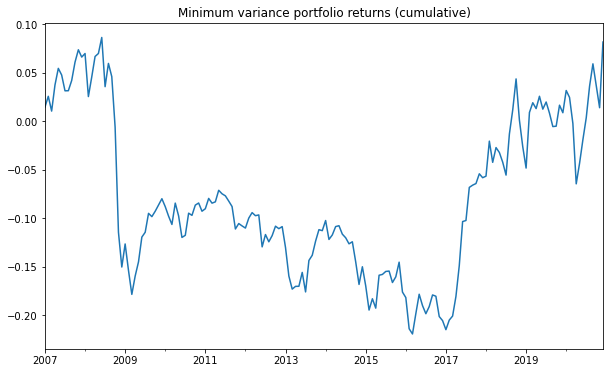

In [17]:
eu_firm_returns_50 = returns[sample_50_firms]

min_var_weights = []
N_yrs = 60 #number of past months we want to keep. Here it is the equivalent of 5 years
monthly_performances = []
min_var_social_score = []


for month in tqdm(range(N_yrs, len(eu_firm_returns_50))):
    rolling_window_returns = eu_firm_returns_50.iloc[month - N_yrs : month]
    mu = expected_returns.mean_historical_return(rolling_window_returns[:-1],returns_data=True,frequency=12, log_returns=False)
    sigma = risk_models.CovarianceShrinkage(rolling_window_returns[:-1], returns_data=True, frequency=12).ledoit_wolf()
    ef = EfficientFrontier(mu,sigma)

    ef.min_volatility()
    min_var_weights.append(ef.clean_weights())
    min_var_social_score.append(ef.weights @ scores[sample_50_firms].mean().values)

min_var_weights = pd.DataFrame(min_var_weights)
min_var_weights.index = pd.date_range(start='2007/01/31', periods=len(min_var_weights), freq='1M')

min_var_portfolio_returns = eu_firm_returns_50[N_yrs:] * min_var_weights

min_var_portfolio_performance = min_var_portfolio_returns.sum(axis=1)
((min_var_portfolio_performance + 1).cumprod() - 1).plot(figsize=(10,6), title='Minimum variance portfolio returns (cumulative)')
portfolio_stats(min_var_portfolio_returns, "Minimum variance portfolio")

<AxesSubplot:title={'center':'Mean score values in the sample'}>

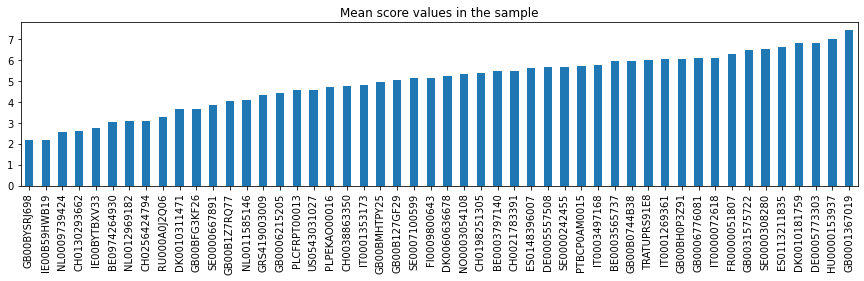

In [18]:
scores[sample_50_firms].mean().sort_values().plot(kind='bar', figsize=(15,3), title='Mean score values in the sample')

In [30]:
scores = scores[~scores.duplicated()]
scores = scores.loc[:, ~scores.columns.duplicated()]

### 5.2 Minimum variance portfolio with improved social score (20%)

100%|██████████| 168/168 [00:02<00:00, 67.47it/s]


,AAR,Annualized volatility,Min return,Max return,Sharpe ratio
Minimum variance portfolio (Improved social score),-0.001899,0.091051,-0.145013,0.087212,-0.032069


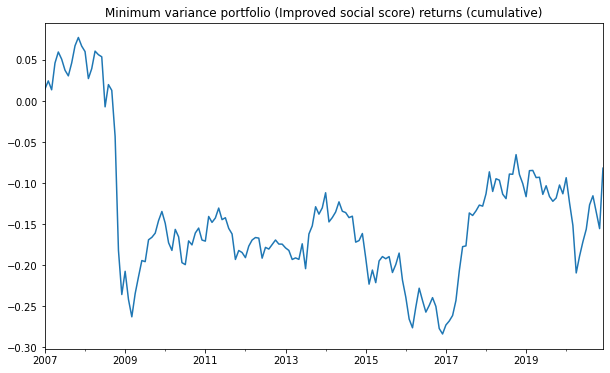

In [19]:
eu_firm_returns_50 = returns[sample_50_firms]

social_min_var_weights = []
N_yrs = 60#number of past months we want to keep. Here it is the equivalent of 5 years
social_monthly_performances = []


for month in tqdm(range(N_yrs, len(eu_firm_returns_50))):
    rolling_window_returns = eu_firm_returns_50.iloc[month - N_yrs : month]
    mu = expected_returns.mean_historical_return(rolling_window_returns[:-1],returns_data=True,frequency=12, log_returns=False)
    sigma = risk_models.CovarianceShrinkage(rolling_window_returns[:-1], returns_data=True, frequency=12).ledoit_wolf()
    ef = EfficientFrontier(mu,sigma)

    ef.add_constraint(lambda weights: weights @ scores[sample_50_firms].mean().values >= 1.2 * min_var_social_score[month - N_yrs])
    ef.min_volatility()

    social_min_var_weights.append(ef.clean_weights())

social_min_var_weights = pd.DataFrame(social_min_var_weights)
social_min_var_weights.index = pd.date_range(start='2007/01/31', periods=len(social_min_var_weights), freq='1M')


social_min_var_portfolio_returns = eu_firm_returns_50[N_yrs:] * social_min_var_weights

social_min_var_portfolio_performance = social_min_var_portfolio_returns.sum(axis=1)
((social_min_var_portfolio_performance + 1).cumprod() - 1).plot(figsize=(10,6), title='Minimum variance portfolio (Improved social score) returns (cumulative)')
portfolio_stats(social_min_var_portfolio_returns, "Minimum variance portfolio (Improved social score)")

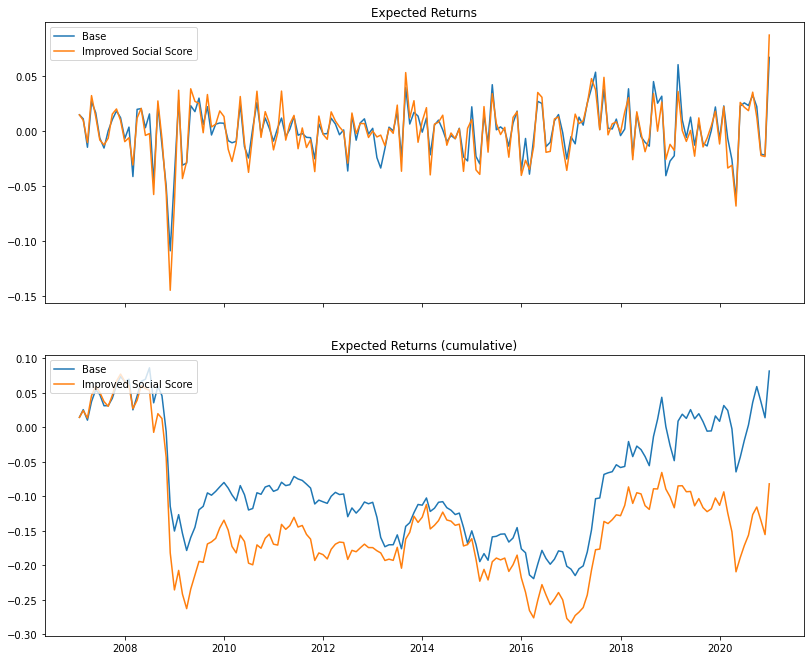

In [20]:
#Alternative way of ploting the statistics of the monthly portfolio
fig, axs = plt.subplots(2, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
fig.tight_layout()
fig.set_size_inches(12, 10)

axs[0].plot(min_var_portfolio_performance, label='Base')
axs[0].plot(social_min_var_portfolio_performance, label='Improved Social Score')
axs[0].legend(loc='upper left')
axs[0].set_title('Expected Returns')

# Plot each graph, and manually set the y tick values
axs[1].plot((min_var_portfolio_performance + 1).cumprod() - 1, label='Base')
axs[1].plot((social_min_var_portfolio_performance + 1).cumprod() - 1, label='Improved Social Score')
axs[1].legend(loc='upper left')
axs[1].set_title('Expected Returns (cumulative)')
'''
axs[2].plot(portfolio_stats(min_var_portfolio_returns)['Annualizedvolatility'],label='Base')
axs[2].plot(portfolio_stats(social_min_var_portfolio_returns)['Annualizedvolatility'],label='Improved Social Score')
axs[2].legend(loc='upper left')
axs[2].set_title('Volatility')

axs[3].plot(portfolio_stats(min_var_portfolio_returns)['Sharpe ratio'],label='Base')
axs[3].plot(portfolio_stats(social_min_var_portfolio_returns)['Sharpe ratio'],label='Improved Social Score')
axs[3].legend(loc='upper left')
axs[3].set_title('Sharpe Ratio')
'''

plt.savefig('monthly-performance-V.png')
plt.show()